# Assignment 1

_by Dmytro Miedviediev 2023-10-27_

**Note**

Plotly plots are interactive if using `.html` format! 

In [142]:
import pandas as pd
import numpy as np
from scipy import stats
import quantecon as qe
import datetime
import yfinance as yf
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode()

df = pd.read_csv("ceo.csv", delimiter=";", decimal=",", usecols=["salary", "totcomp", "tenure", "age", "sales", "profits", "assets"])
df.dtypes

salary       int64
totcomp      int64
tenure       int64
age          int64
sales      float64
profits    float64
assets     float64
dtype: object

# Problem 1

## Task 1 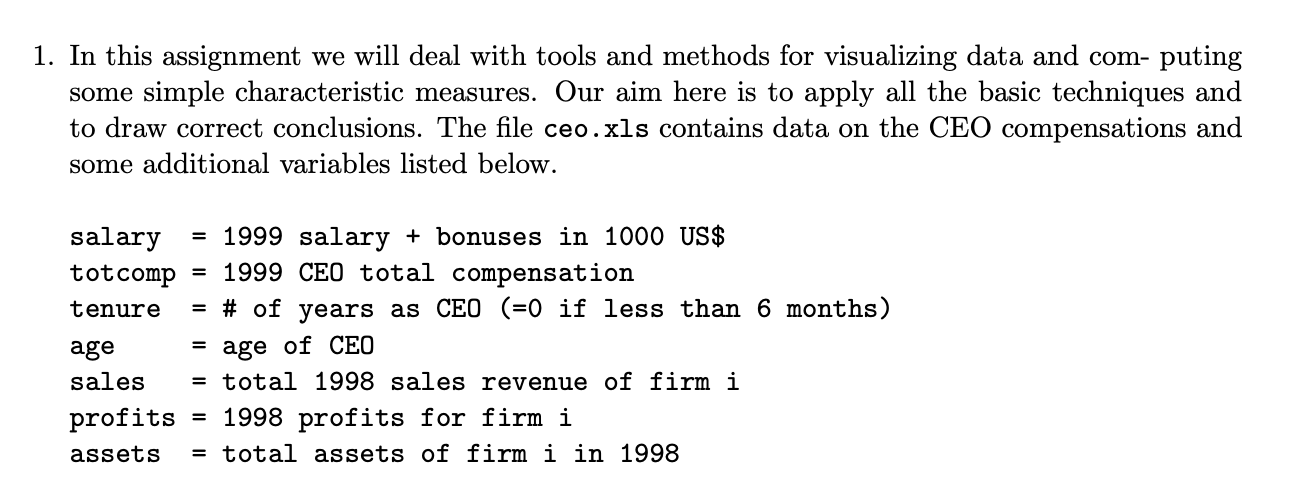

### a) 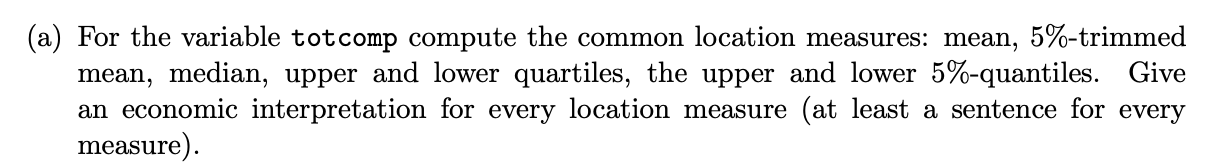

In [143]:
# selecting column to analyse & sort them
totcomp = df["totcomp"].sort_values()
# alpha for all advanced stats 5%
alpha = 0.05

In [144]:
# calculating location measures
stats_basic = totcomp.describe()
stats_alpha = pd.Series([
    stats.trim_mean(totcomp, proportiontocut=alpha),
    totcomp.quantile(q=alpha),
    totcomp.quantile(q=1 - alpha),
], index=[
    f"{alpha*100}%-trimmed-mean",
    f"lower {alpha * 100}%-quartile",
    f"upper {(1 - alpha) * 100}%-quartile"
])

stats_all = pd.concat([stats_basic, stats_alpha])
stats_all

count                      447.000000
mean                      8340.058166
std                      31571.803005
min                        100.000000
25%                       1575.500000
50%                       2951.000000
75%                       6043.000000
max                     589101.000000
5.0%-trimmed-mean         4637.679901
lower 5.0%-quartile        783.700000
upper 95.0%-quartile     24563.300000
dtype: float64

Summary (measures economic interpetation):

`mean: 8340.06` - average salary of all CEOs

`25% (lower quartile): 1575.5` - 25% of all CEOs have totcomp less or equal to this number

`50% (median): 2951` - half of all CEOs have totcomp less or equal to this number. This is median. Comparing to lower quartile we see x2 increase.

`75% (upper quartile): 6043` - 75% of all CEOs have totcomp less or equal to this number. Comparing to median we see x2 increase.

`5%-trimmed mean` - average totcomp 90% of CEOs with trimmed 5% the smallest and biggest totcomp. We see that it radically different from `mean`. It means that there are some very big or small values in the data that influence `mean`. On the other hand it is relatively close to the `med`, but bigger. It can indicate right data skewness.

`5% (lower 5% quartile)` - 5% of all CEOs have totcomp less or equal to this number. It is not much different from `25% quantile`. So, we don't have more than 5% very small values.

`95% (upper 5% quartile)` - 95% of all CEOs have totcomp less or equal to this number. We can see very big shift from `75% quantile`, what means we have more than 5% of enourmously big values which influence `mean` to be much different from `5%-trimmed mean` and `median`.

### b) 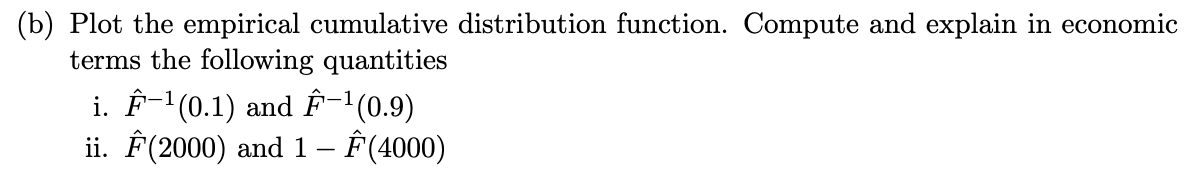

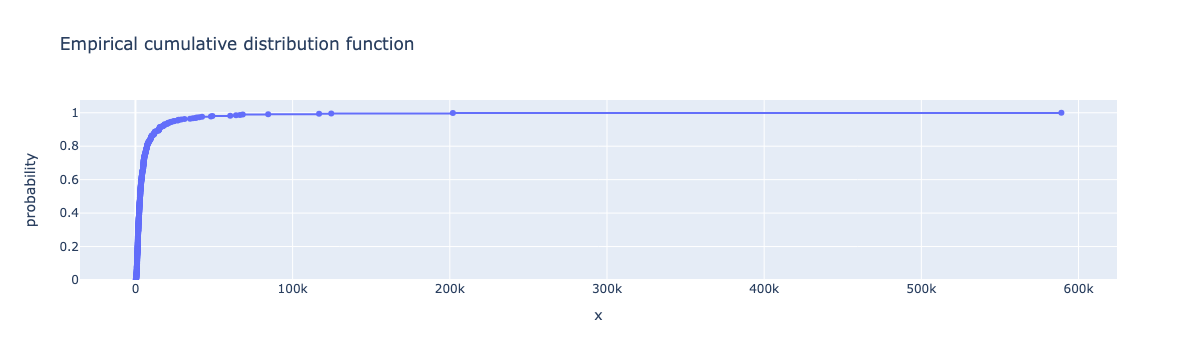

In [145]:
# plotting ECDF
fig = px.ecdf(totcomp, x=totcomp, markers=True, ecdfmode="standard",
              title="Empirical cumulative distribution function")
fig.show()

In [146]:
alpha = 0.1
x1 = 2000
x2 = 4000

print(f"""
i)
x value at p={alpha}: {totcomp.quantile(q=alpha)}
x value at p={1-alpha}: {totcomp.quantile(q=1-alpha)}

ii)
p value at x={x1}: {(totcomp <= x1).sum() / totcomp.count()}
p value at x={x2}: {(totcomp <= x2).sum() / totcomp.count()}
""")


i)
x value at p=0.1: 1002.4
x value at p=0.9: 15046.000000000005

ii)
p value at x=2000: 0.34451901565995524
p value at x=4000: 0.6152125279642058



i) Empirical cumulative distribution function is a function that returns a relative number of observation that less or equal input value

However, inverse ECDF function accepts relative number of observation and returns value that matches the same condition. So we interchange outputs and inputs.

Generally, we have the same meaning as with the quantiles. So, for this options it means that 10% and 90% of all CEOs have totcomp less or equal to this number.

ii) As it is stated above, we calculate relative number of observation that less or equal input value

In this case, we calculated in % how many CEOs have totcomp less or equal 2000 and 4000.


### c) 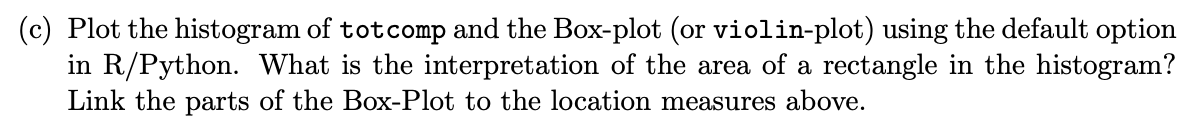

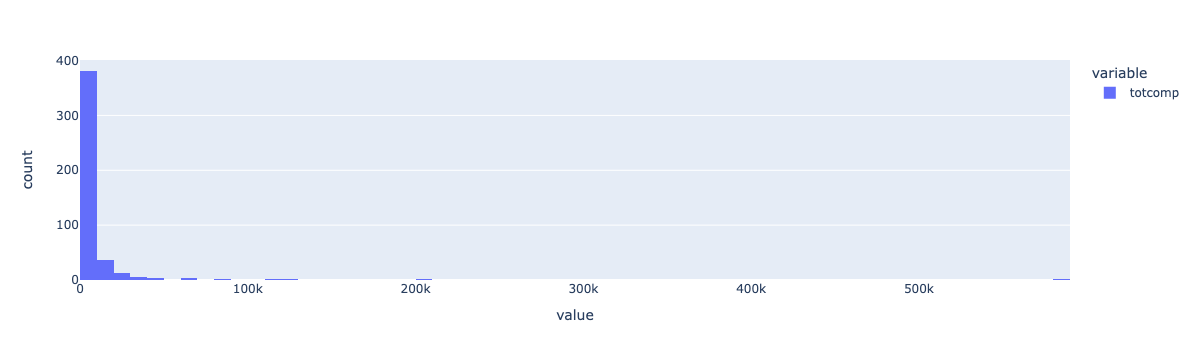

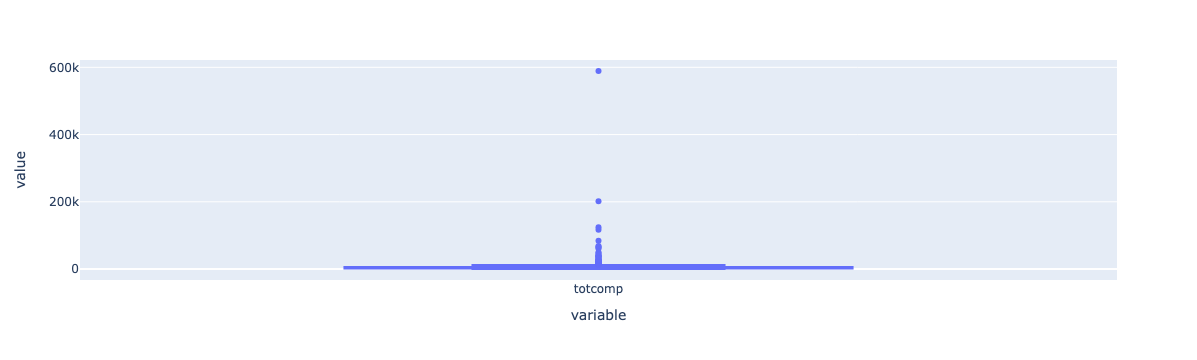

In [147]:
# plotting histogram
fig = px.histogram(totcomp)
fig.show()

# plotting box-plot
fig = px.box(totcomp)
fig.update_traces(quartilemethod="inclusive") # default quartilemethod is linear ???
fig.show()

Histogram:

In this default version, the area of a rectangle in the histogram represents the count of observations falling within a bin (10k). So total area should be equal to the total number of observations in the dataset.

Box-plot:

- `min`, `max` : upper and lower dots represents this measures
- `75%`, `25%` : upper and lower boundaries of the box represents this quartiles (or quantiles)
- `med` or `50%` : line crossing the box represents this measure
- There are also upper and lower fences that represent  `quantile(75%) + 1.5IQR` and `quantile(25%) - 1.5IQR`, where `IQR = quantile(75%) - quantile(25%)`

### d) 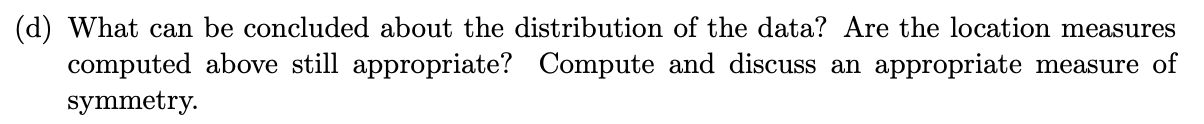

In [148]:
print(f"Gini: {qe.gini_coefficient(totcomp.values)}")

Gini: 0.6889302960898994


In [149]:
print(f"Skewness: {totcomp.skew()}")

Skewness: 14.846354794940227


Distribution:

We have an unimodal distribution with big right tail (according to histogram). Additionally, large Gini coefficient shows that data is pretty concentrated. It is also visible on the histogram, >75% observations are in range 0-10k while max value is about 600k.

Measures:

It is clear that data is not symmetric which make `mean` not meaningful. Other location measures are robust to outliers and are helpfull for our analysis.

Symmetry:

As far the distribution is unimodal, we can calculate skewness. As was assumed at the beginning, we have right-skewed (positive) data.

### e) 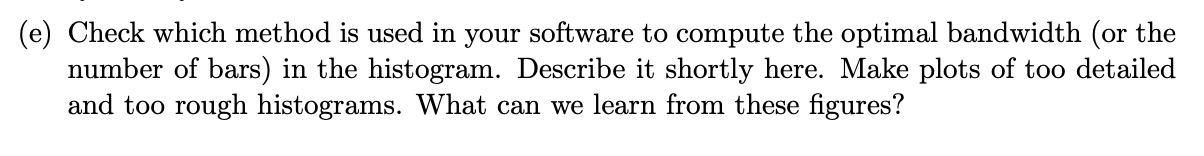

Method:

Algorithm used is "Sturges formula":

k = log2(N+1)

- k is the recommended number of bins.
- N is the total number of data points.



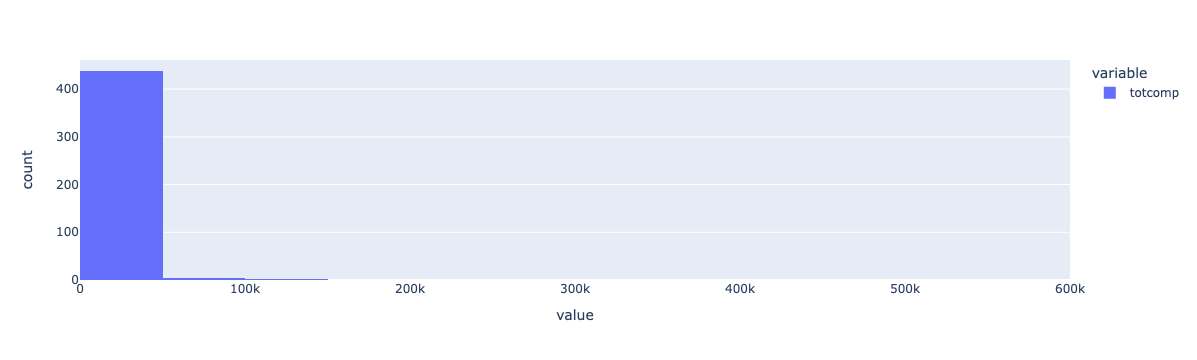

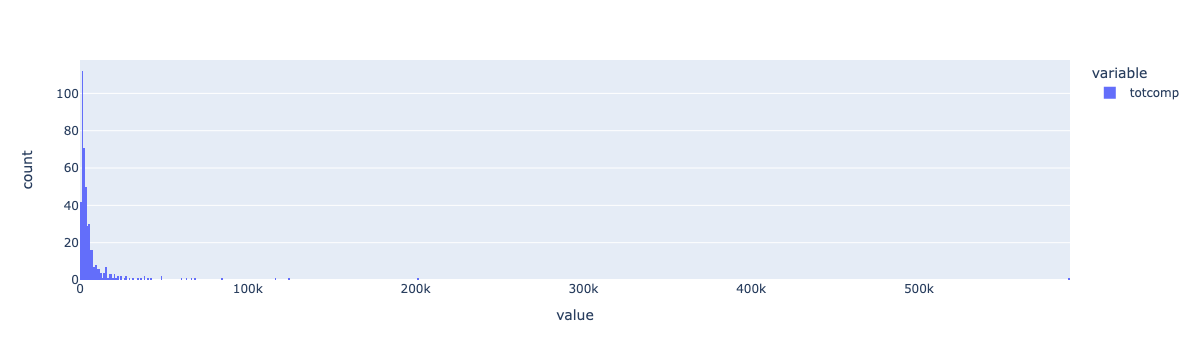

In [150]:
# plotting histogram with big width (small amount of bins) 
fig = px.histogram(totcomp, nbins=13)
fig.show()

# plotting histogram with small width (huge amount of bins) 
fig = px.histogram(totcomp, nbins=1000)
fig.show()

Histograms:

From the histogram with small amount of bins we can see very generic information as the width is very big to catch up any details.

Otherwise, from the histogram with big amount of bins we can split histogram to the very detailed version to see almost every sample, which is not purpose of this plot. 

In our case, both histograms helped to visualize issue with big values. From the histogram with big amount of bins, we can see the distribution and symmetry issues.

### f) 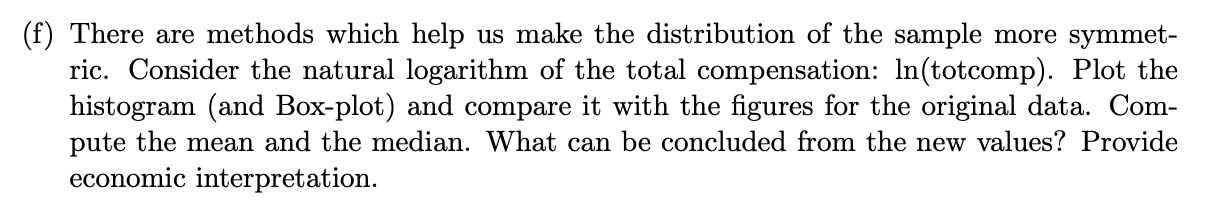

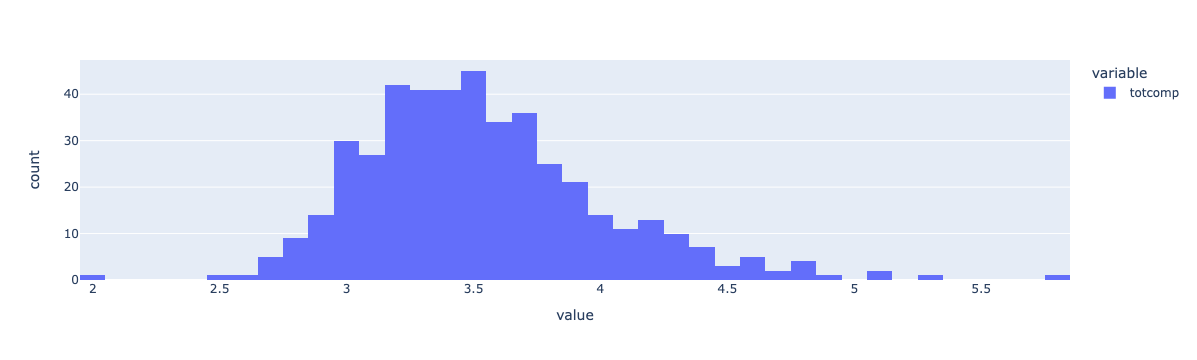

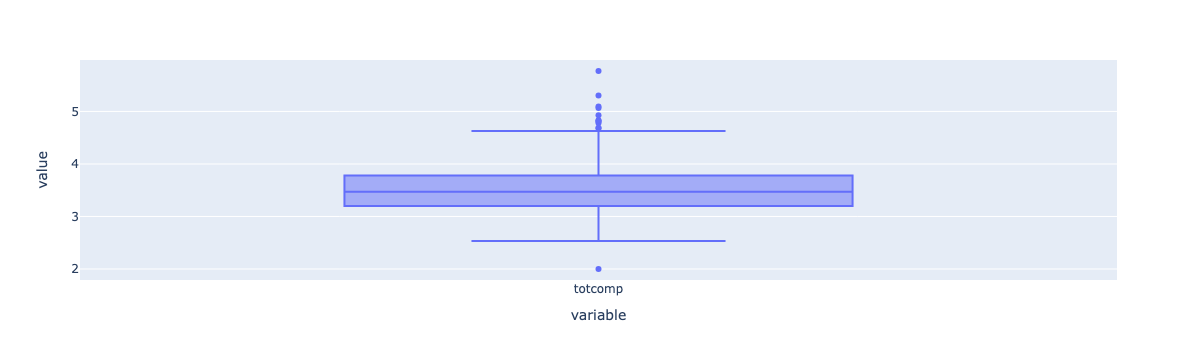

count    447.000000
mean       3.533284
std        0.475037
min        2.000000
25%        3.197418
50%        3.469969
75%        3.781252
max        5.770190
Name: totcomp, dtype: float64

In [151]:
# apply ln to totcomp values
ln_totcomp = np.log10(totcomp)

# plotting histogram
fig = px.histogram(ln_totcomp)
fig.show()

# plotting box-plot
fig = px.box(ln_totcomp)
fig.update_traces(quartilemethod="inclusive") # default quartilemethod is linear
fig.show()

ln_totcomp.describe()

Plots:

With ln(totcomp) we have absolutely different visualizations as this function helped to make extreme values much smaller. This version is much more interpretable.

With Box-plot it is easier to see outliers, like `100`, which was hidden with the regular plot. Additionally, we can see skewness of the data by comparing two areas of the box splitted by line. Upper (right) side has bigger area, so the data skewed to the right.

Measures:

`mean` - much different from previos value. It is closer to the trimmed mean than to arithmetic one. This measure has separate name - `logarithmic mean`. It is always smaller than the arithmetic mean and more robust to outliers.

`med` - stays the same as previously if transform back. It is clear that number of the half of the users that has totcomp less equal to `med` should stays the same.

## Task 2 
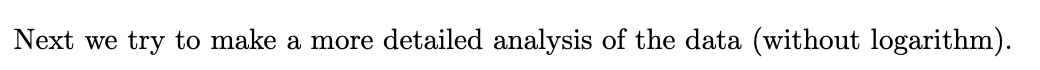

### a) 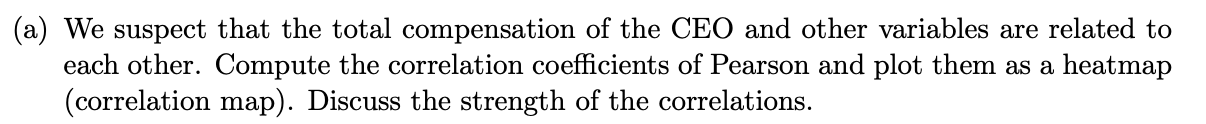

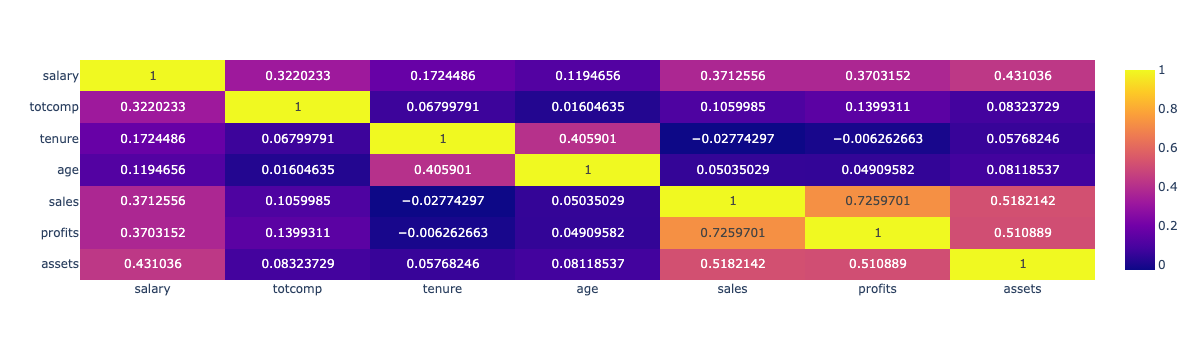

In [152]:
# plotting Pearson correlation
pearson_corr = df.corr(method='pearson')

fig = px.imshow(pearson_corr, text_auto=True, aspect="auto")
fig.show()

Pearson correlation is used to determine linear dependencies.

We observe `totcomp` vs other columns correlations:
- salary - no perfect matching but also no independence, relatively moderate dependence ~0.32
- tenure - almost independence ~0.06
- age - independence ~0.01
- sales - small dependence ~0.1
- profits - small dependence ~0.14
- assets - almost independence ~0.08

### b) 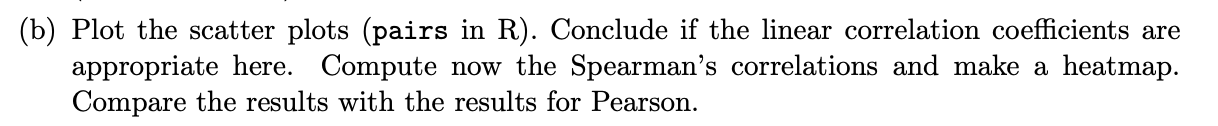

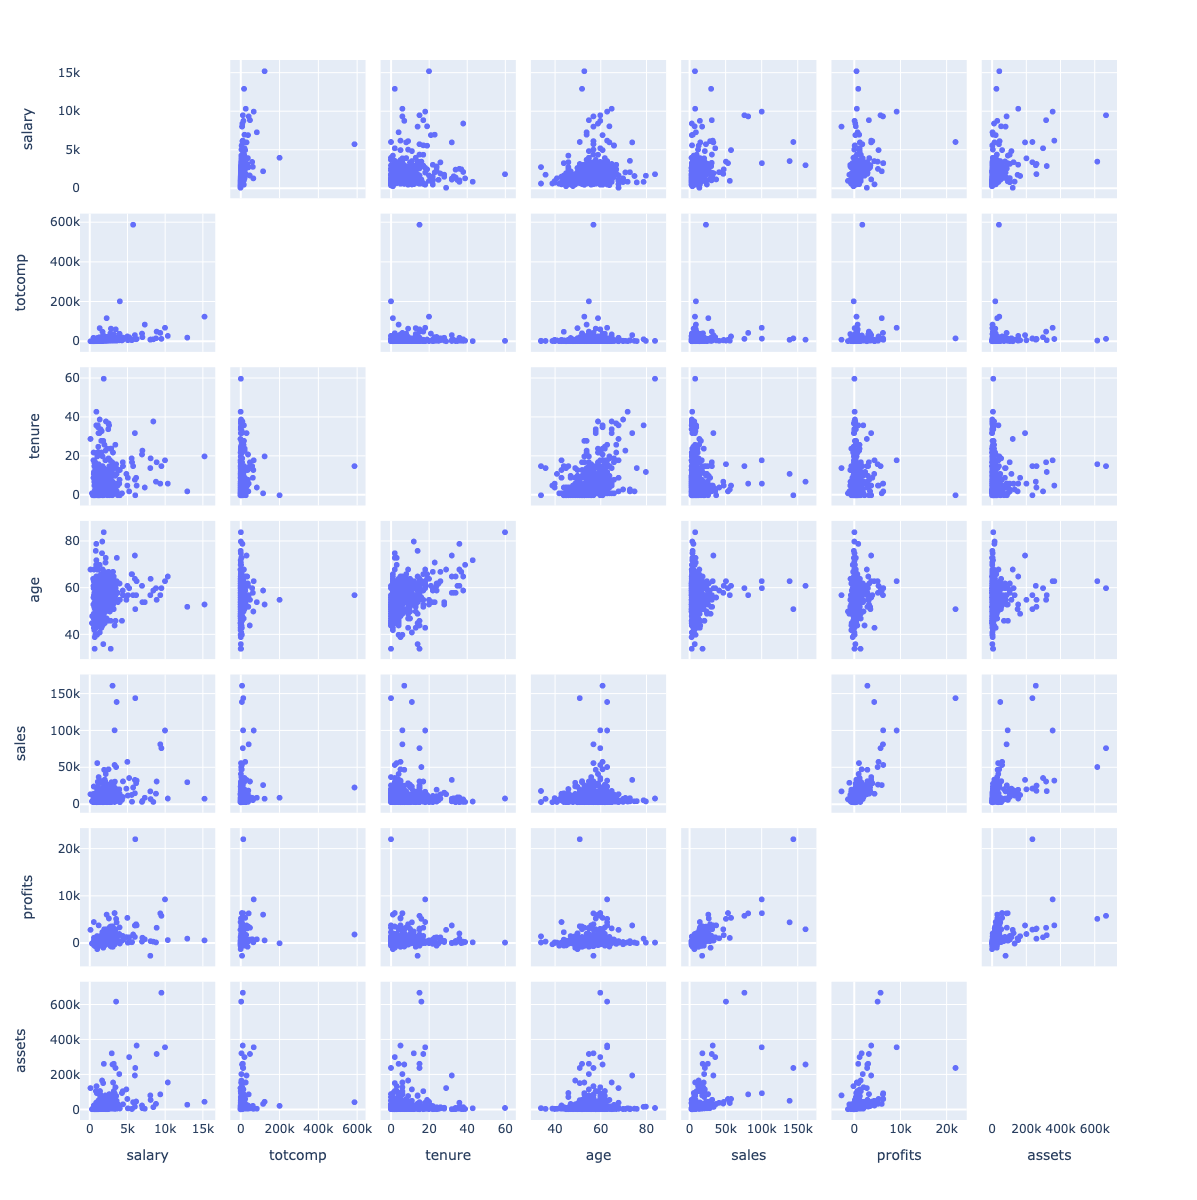

In [153]:
# plotting scatter plots matrix 
fig = px.scatter_matrix(df)
fig.update_layout(
    width=1200,
    height=1200,
)
fig.update_traces(diagonal_visible=False)
fig.show()

Linear correlation coefficients:

Scatter plots additionally proves that we don't have any clear linearial dependency between totcomp and other feature. So, linear correlation coefficients have no sense for totcomp analysis. What is usefull is the information that some features can be multicolinear. For example, profits and sales.

The biggest Pearson correlation coefficient is for salary (for totcomp). From the scatter plot we can see why. It is because of the noice that points create, but truly no dependency can be inferred here.

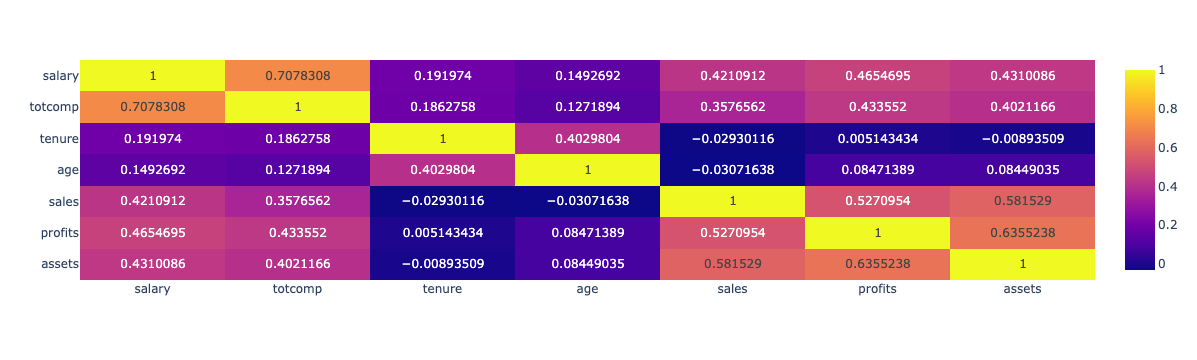

In [154]:
# plotting Spearman correlation
pearson_corr = df.corr(method='spearman')

fig = px.imshow(pearson_corr, text_auto=True, aspect="auto")
fig.show()

Spearman vs Pearson:

As was previously discussed, Pearson coefficients are not very relevant for this data. However, Spearman shows dependency from another perspective. It reveals that salary has strong monotonic dependency with totcomp. Also, we see bigger monotonic impact of sales, profits, and assets comparing to linerial. In particular, age and tenure have small effect even for Spearman correlation coefficient. We can conclude that this features have small linear and monotonic dependency on the totcomp.

Generally, most of the coefficients are bigger than Pearson showing that we are working mostly with monotonic dependencies than linear ones.

### c) 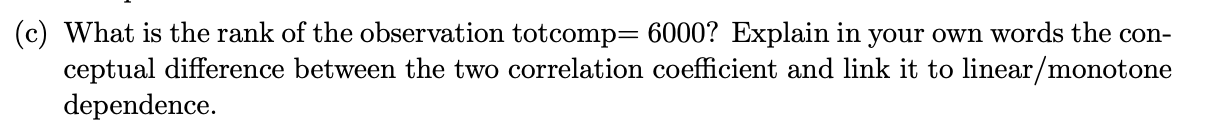

In [155]:
# totcomp = 6000 rank
# as totcomp is already sorted (at the beginning), just use it
number = 1500 # choose another number as there are no 6000 in the totcomp
filtered_list = totcomp.reset_index(drop=True)[totcomp == number]
n_samples = len(filtered_list)

print(f"Number of samples: {n_samples}")
print(f"Rank: {(filtered_list.index.values + 1).sum() / n_samples}") # average of identical observations. As index starts from 0, added 1 to all numbers
filtered_list

Number of samples: 1
Rank: 283.0


282    4212
Name: totcomp, dtype: int64

Difference:

Pearson is designed to find linear dependencies by calculating sample covarience. Here we treat each sample's magnitude to have linear pattern.

Spearman is designed to find monotonic dependencies by calculating the same Pearson coefficient, but on sample's ranks. Here we treat each sample's position in sorted array. We seek only that, for example, previous value is less then the next ones and don't care about magnitude (monotonic).

### d) 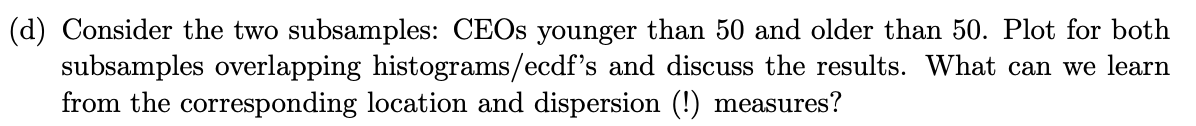

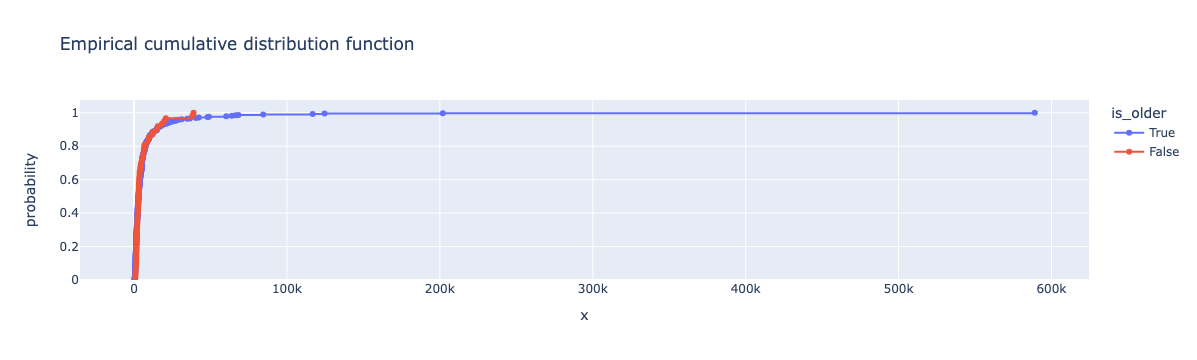

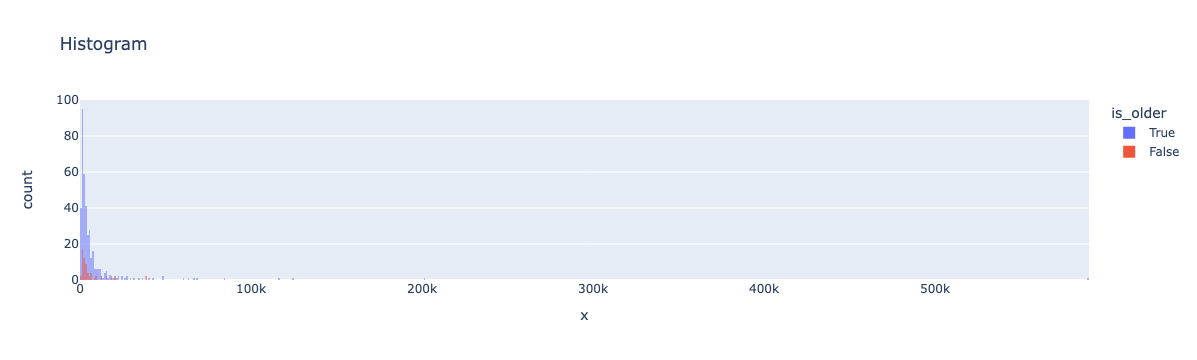

older 50:
count       385.000000
mean       9125.961039
std       33863.124895
min         100.000000
25%        1679.000000
50%        3161.000000
75%        6537.000000
max      589101.000000
Name: totcomp, dtype: float64

----------

younger 50:
count       62.000000
mean      3459.854839
std       6416.934986
min        341.000000
25%       1067.750000
50%       1819.000000
75%       3235.000000
max      48018.000000
Name: totcomp, dtype: float64


In [156]:
# adding new split column
df_with_age_bins = df.copy()
df_with_age_bins["is_older"] = df_with_age_bins["age"] >= 50

# plotting ECDF
fig = px.ecdf(df_with_age_bins, x=totcomp, color="is_older", markers=True, ecdfmode="standard",
              title="Empirical cumulative distribution function")
fig.show()

# plotting histogram
fig = px.histogram(df_with_age_bins, x=totcomp, color="is_older", barmode="overlay", nbins=1000, title="Histogram")
fig.show()

# printing location & dispersion measures
print(f'older 50:\n{df_with_age_bins[df_with_age_bins["is_older"]]["totcomp"].describe()}\n\n----------\n')
print(f'younger 50:\n{df_with_age_bins[~df_with_age_bins["is_older"]]["totcomp"].describe()}')

Plots:

Based on plots, we can see that not group of people younger than 50 is much smaller than the older one. Another point is that the yonger group has less anormous big values which leads to better data concentration, but still it saves tendency to have very big totcomp values comparing to upper quartile.

Measures:

From location measures we can learn that this group has much less difference between quartiles and min/max values. As for dispersion, as it was shown on the plots, we have more than 5 times smaller sample standard deviation, which means that the group has lower value difference from mean.

## Task 3 
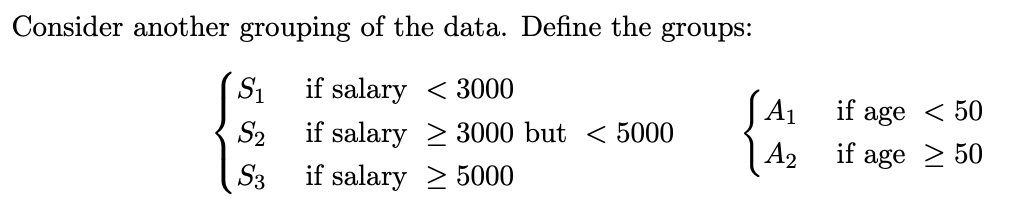

In [157]:
# adding new split columns
df_grouped = df.copy()
df_grouped["is_older"] = df_grouped["age"] >= 50
df_grouped["salary_group"] = pd.cut(df_grouped["salary"], bins=[0, 3000, 5000, 600000], include_lowest=True, labels=["< 3000", ">= 3000 & < 5000", ">= 5000"])

### a) 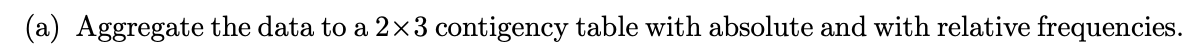

In [158]:
# contigency table with absolute frequencies
contigency_absolute = pd.crosstab(df_grouped["is_older"], df_grouped["salary_group"])

# contigency table with relative frequencies
contigency_relative = contigency_absolute.apply(lambda val: val/len(df_grouped), axis=1)

# printing location & dispersion measures
print(f'absolute frequencies:\n{contigency_absolute}\n\n----------\n')
print(f'relative frequencies:\n{contigency_relative}')

absolute frequencies:
salary_group  < 3000  >= 3000 & < 5000  >= 5000
is_older                                       
False             59                 3        0
True             325                36       24

----------

relative frequencies:
salary_group    < 3000  >= 3000 & < 5000   >= 5000
is_older                                          
False         0.131991          0.006711  0.000000
True          0.727069          0.080537  0.053691


### b) 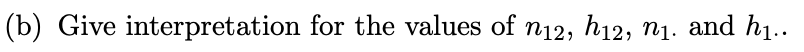

n12 - number of samples with salary >= 3000 & 5000 (equal to 3)

h12 - frequency of samples with salary >= 3000 & 5000 of all samples (equal to 0.0067)

n1 - number of samples younger 50 (equal to 59+3+0=62)

h1 - frequency of samples younger 50 of all samples (equal to 0.132+0.0067=0.1369)

### c) 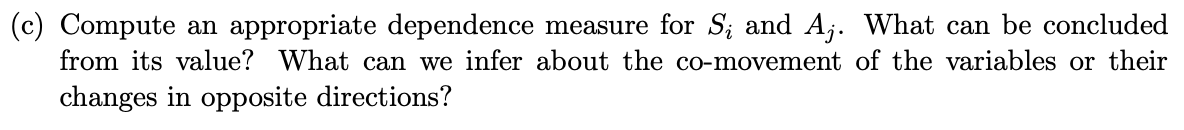

In [159]:
# calculating Pearson’s Contingency Coefficient
stats.contingency.association(contigency_absolute, method='pearson')

0.11345379599961566

Pearson’s Contingency Coefficient:

Coefficient is small showing that there are no dependency between age and salary groups. With this coefficient we can only judge magnitude of the dependency but not the direction.

# Problem 2

## Task 1
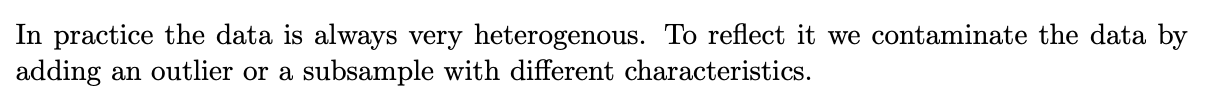

### a) 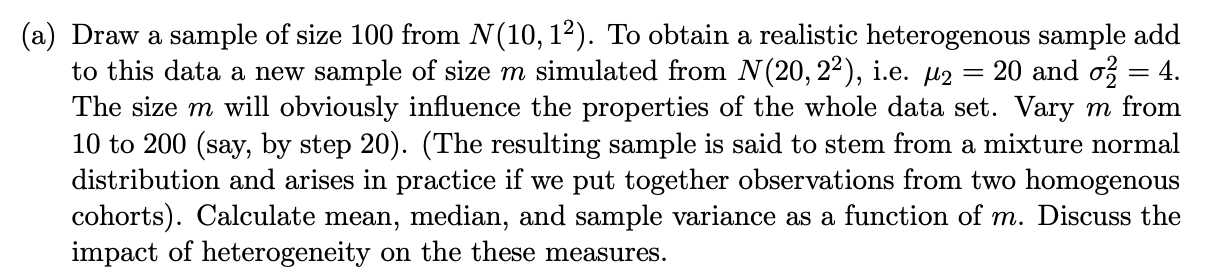

In [160]:
# set params
params = [[10, 1], [20, 2]] # [mean, std]
m_arr = [0] + list(range(10, 200, 20)) + [100]
n_arr = ([100] * (len(m_arr) - 1)) + [0]

# create dataset with samples & measures
df_samples = pd.DataFrame({"m": m_arr, "n": n_arr})
df_samples["sample"] = df_samples.apply(
    lambda row: np.concatenate((
        np.random.normal(params[0][0], params[0][1], size=row["n"]),
        np.random.normal(params[1][0], params[1][1], size=row["m"])
    ))
, axis=1)
df_samples = df_samples.join(df_samples["sample"].apply(pd.Series).apply(pd.Series.describe, axis=1))
df_samples

m    n                                             sample  count  \
0     0  100  [10.737328646170425, 9.577650752603576, 10.633...  100.0   
1    10  100  [9.310090001511576, 11.492463780152002, 8.5291...  110.0   
2    30  100  [10.755947980188326, 9.301548516460988, 11.046...  130.0   
3    50  100  [11.122573754932004, 8.928721696653001, 9.0710...  150.0   
4    70  100  [11.300232290119222, 8.884110988409379, 10.613...  170.0   
5    90  100  [11.754482283284505, 10.228668477452683, 10.67...  190.0   
6   110  100  [9.593512025410078, 10.361953723113412, 9.5077...  210.0   
7   130  100  [10.584729039121548, 9.714942338863494, 10.524...  230.0   
8   150  100  [11.938432008634065, 8.788281515412377, 7.7930...  250.0   
9   170  100  [9.449763129227197, 11.521424808935718, 9.5806...  270.0   
10  190  100  [11.306723278319746, 10.55396880258276, 11.859...  290.0   
11  100    0  [17.97726488210743, 23.11398375376514, 18.1415...  100.0   

         mean       std        min        25%        50%        75%        max  
0   10.147775  0.962163   7.797098   9.607313  10.230675  10.832248  11.953873  
1   10.960620  3.277864   7.319207   9.426287  10.128376  10.894567  27.127423  
2   12.438953  4.485965   6.598843   9.658056  10.528601  11.954514  25.030557  
3   13.403431  4.865862   7.916763   9.820123  10.792640  18.482086  23.636978  
4   14.115572  5.037241   7.012197   9.916292  11.090619  19.312114  25.534657  
5   14.985624  5.360487   7.712873  10.095179  12.084036  20.346018  24.821037  
6   15.218992  5.073686   8.121786  10.160342  16.754613  19.877370  25.717394  
7   15.499658  5.267239   7.224831  10.053466  17.308808  20.100476  24.717558  
8   15.897736  5.135294   7.674014  10.319775  17.953314  20.179946  25.954991  
9   16.159225  4.927615   8.026288  10.474045  18.051556  20.144248  23.947393  
10  16.397747  4.943054   7.616184  10.637701  18.417866  20.187543  25.033203  
11  19.899253  1.971270  15.517006  18.528236  20.093428  21.099170  26.352211

Measures:

`mean` - with increasing `m` the value on every step shifts to the second mean as number of the second distribution's samples increases.

`med` - with increasing `m` the value increased only after size of the second sample became bigger. Logically, because after m=100 majority of samples has bigger mean.

`variance` - with increasing `m` the value increasing till the sizes are equal and then remains +- stable. This is because at this point we got enough points to represent all possible variances.

Let's check this on plots

### b) 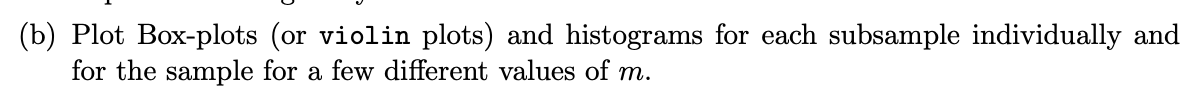

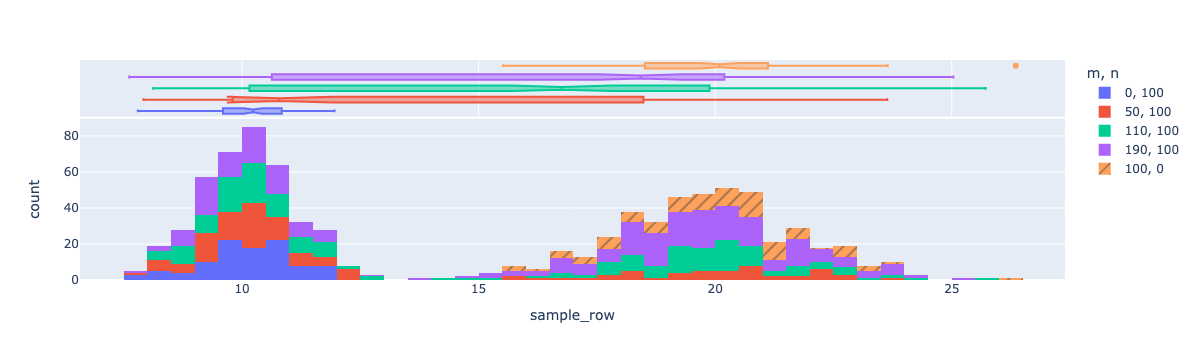

In [161]:
# selecting samples to plot
df_samples_full = df_samples.join(df_samples["sample"].explode(), rsuffix="_row")
df_samples_full = df_samples_full[df_samples_full["m"].isin([0, 50, 110, 190, 100])]

# plotting histograms with box-plots
df = px.data.tips()
fig = px.histogram(df_samples_full, x="sample_row", color="m", pattern_shape="n",
                   marginal="box", nbins=75)
fig.show()

## Task 2 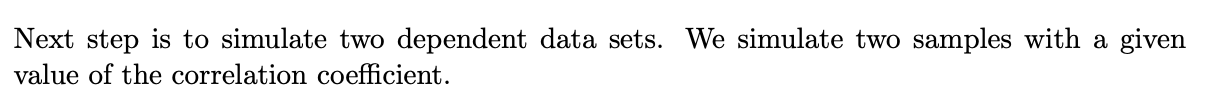

### a) 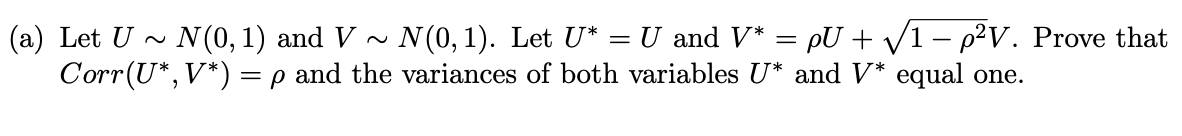

Assuming that U and V are independent.

Variances: 

Var(U*) = Var(U) = 1 

Cov(U,V) = E([U - E(U)][V - E(V)]) = E(UV) = E(U) * E(V) = 0

Var(V*) = $p^2$*Var(U) + (1 - $p^2$)*Var(V) + 2*p*$\sqrt{1-p^2}$*Cov(U*,V)

Var(V*) = Var(V) + 2*p*$\sqrt{1-p^2}$Cov(U,V) = Var(V)

Var(V*) = 1, as Cov(U,V) = 0

Correlation:

Corr(U*, V*) = Corr(U, V*), as U* = U

Corr(U*, V*) = $\frac{Cov(U, V*)}{\sqrt[]{Var(U)Var(V*)}}$ = Cov(U, V*), as Var(V*) = Var(U*) = 1

Cov(U*, V*) = Cov(U, pU + $\sqrt{1-p^2}$V) = Cov(U,pU) + Cov(U, $\sqrt{1-p^2}$V), as Cov(aX+bY,cW+dZ) = ac*Cov(X,W) + ad*Cov(X,Z) + bc*Cov(Y,W) + bd*Cov(Y,Z)

Cov(U*, V*) = pVar(U) + $\sqrt{1-p^2}$Cov(U,V) = p + 0 = p

### b) 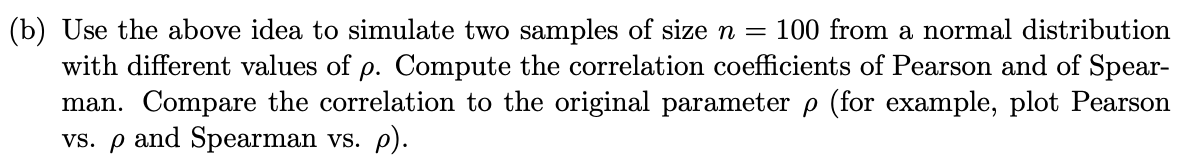

In [162]:
# set params
# V* = p * U + sqrt(1-p^2) * V
# E(V*) = p * E(U) + sqrt(1-p^2) * E(V) = 0
params = [[0, 1], [0, 1]] # [mean, std]
n = 100
p_arr = [0.1, 0.3, 0.5, 0.7, 0.9]

# create dataset with samples & correlations
df_samples = pd.DataFrame({"p": p_arr})
df_samples[["U", "V"]] = df_samples.apply(
    lambda row: [
        np.random.normal(params[0][0], params[0][1], size=n),
        np.random.normal(params[1][0], params[1][1], size=n)
    ], axis=1).apply(pd.Series)
df_samples["V*"] = df_samples.apply(lambda row: row["p"] * row["U"] + np.sqrt(1-row["p"]**2) * row["V"], axis=1)
df_samples[["Pearson", "Spearman"]] = df_samples.apply(
    lambda row: [
        pd.Series(row["U"]).corr(other=pd.Series(row["V*"]), method='pearson'),
        pd.Series(row["U"]).corr(other=pd.Series(row["V*"]), method='spearman'),
    ], axis=1).apply(pd.Series)
df_samples = df_samples[["p", "U", "V*", "Pearson", "Spearman",]]
df_samples

p                                                  U  \
0  0.1  [0.6618868098023784, 1.2417625080436316, 0.704...   
1  0.3  [0.026225000226673793, 1.0694209257310057, -0....   
2  0.5  [0.3392092233501068, 2.6020741712729523, -0.65...   
3  0.7  [-0.1836502078583227, -0.5142597064679663, -0....   
4  0.9  [0.0731948375964831, -0.0305276421528103, -2.5...   

                                                  V*   Pearson  Spearman  
0  [-1.764598291872301, -0.38517639284643296, 0.2...  0.054331  0.038872  
1  [-2.0589072598203795, 1.4647665525196656, -0.9...  0.309618  0.327453  
2  [0.25554265548945965, 1.4002256851085169, 0.41...  0.497020  0.442820  
3  [0.9978390674972956, -0.7458859551364956, 1.40...  0.709902  0.741086  
4  [0.023259761374337544, -0.7280439501310922, -1...  0.889799  0.898914

We can see that the both correlation measures are relatively similar to the "p" value even with 100 sample size. With increasing size of the sample, calculated correlation measure will be closer to the specified "p" value.

Let's plot this relation visually. We should see line close to the straight.

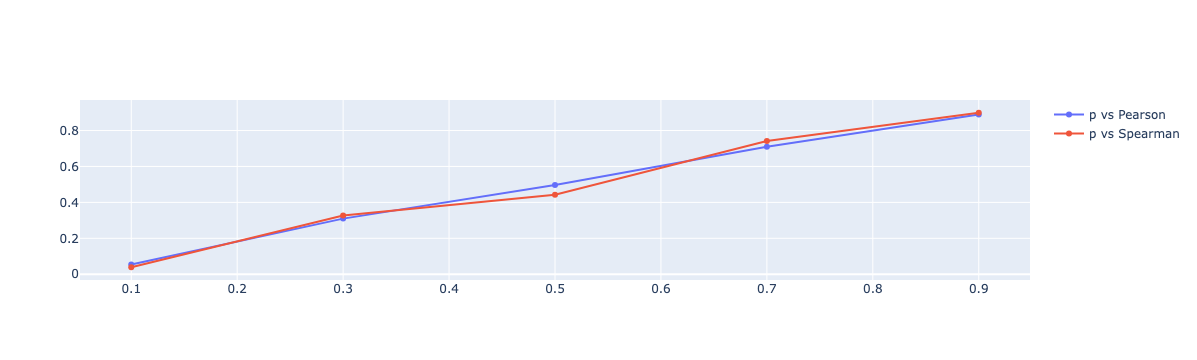

In [163]:
# plotting differences
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_samples["p"], y=df_samples["Pearson"],
                    mode='lines+markers',
                    name='p vs Pearson'))
fig.add_trace(go.Scatter(x=df_samples["p"], y=df_samples["Spearman"],
                    mode='lines+markers',
                    name='p vs Spearman'))
fig.show()

### c) 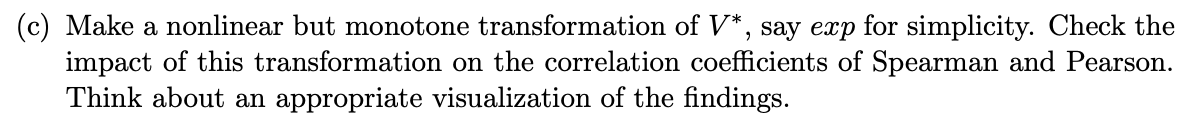

In [164]:
# applying monotone np.exp transformation to V*
df_samples_exp = df_samples.copy()
df_samples_exp.index += 3
df_samples_exp["V*"] = df_samples_exp.apply(lambda row: np.exp(row["V*"]), axis=1)
df_samples_exp[["Pearson", "Spearman"]] = df_samples_exp.apply(
    lambda row: [
        pd.Series(row["U"]).corr(other=pd.Series(row["V*"]), method='pearson'),
        pd.Series(row["U"]).corr(other=pd.Series(row["V*"]), method='spearman'),
    ], axis=1).apply(pd.Series)
df_samples["type"] = "regular"
df_samples_exp["type"] = "exp"
df_samples_full = pd.concat([df_samples, df_samples_exp])      
df_samples_full

p                                                  U  \
0  0.1  [0.6618868098023784, 1.2417625080436316, 0.704...   
1  0.3  [0.026225000226673793, 1.0694209257310057, -0....   
2  0.5  [0.3392092233501068, 2.6020741712729523, -0.65...   
3  0.7  [-0.1836502078583227, -0.5142597064679663, -0....   
4  0.9  [0.0731948375964831, -0.0305276421528103, -2.5...   
3  0.1  [0.6618868098023784, 1.2417625080436316, 0.704...   
4  0.3  [0.026225000226673793, 1.0694209257310057, -0....   
5  0.5  [0.3392092233501068, 2.6020741712729523, -0.65...   
6  0.7  [-0.1836502078583227, -0.5142597064679663, -0....   
7  0.9  [0.0731948375964831, -0.0305276421528103, -2.5...   

                                                  V*   Pearson  Spearman  \
0  [-1.764598291872301, -0.38517639284643296, 0.2...  0.054331  0.038872   
1  [-2.0589072598203795, 1.4647665525196656, -0.9...  0.309618  0.327453   
2  [0.25554265548945965, 1.4002256851085169, 0.41...  0.497020  0.442820   
3  [0.9978390674972956, -0.7458859551364956, 1.40...  0.709902  0.741086   
4  [0.023259761374337544, -0.7280439501310922, -1...  0.889799  0.898914   
3  [0.17125556742243248, 0.680330620165307, 1.309...  0.035554  0.038872   
4  [0.12759332009169025, 4.326533104146744, 0.400...  0.260605  0.327453   
5  [1.2911620869940974, 4.056115268370327, 1.5152...  0.538743  0.442820   
6  [2.712414147019511, 0.47431389290679393, 4.069...  0.549913  0.741086   
7  [1.0235323791957853, 0.482852550631982, 0.2070...  0.732330  0.898914   

      type  
0  regular  
1  regular  
2  regular  
3  regular  
4  regular  
3      exp  
4      exp  
5      exp  
6      exp  
7      exp

We can see that the Spearman correlation values were not changed, but the Pearson were. This is because we applied a nonlinear function exp, which altered the linearity, causing changes in Pearson correlation values. Since, exp is also monotonic it has no influence on the Spearman correlation values, which is used to measure monotonic thends.

Let's plot the differences to see it visually

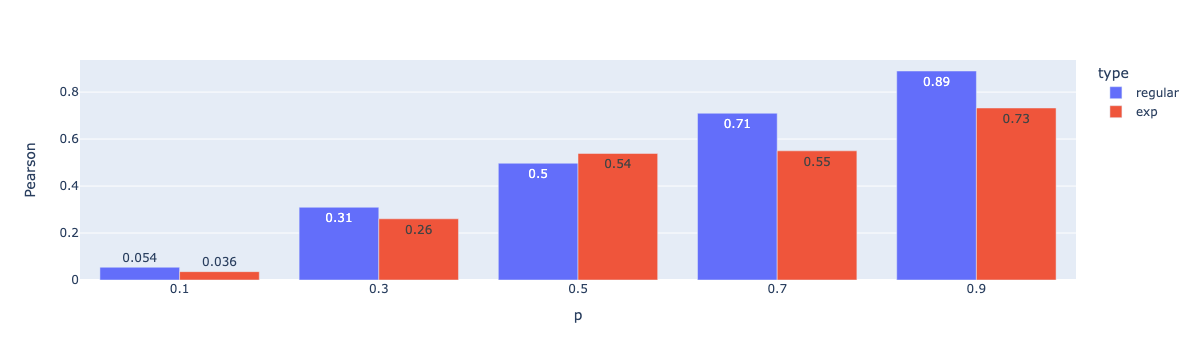

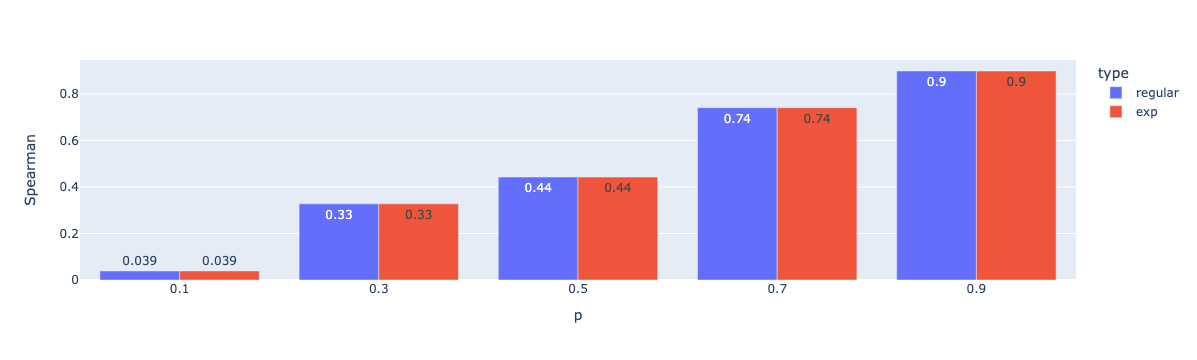

In [165]:
# plotting changes in correlations
fig = px.bar(df_samples_full, x='p', y="Pearson", color="type", text_auto='.2', barmode='group')
fig.show()

fig = px.bar(df_samples_full, x='p', y="Spearman", color="type", text_auto='.2', barmode='group')
fig.show()

# Problem 3

## Task 1 
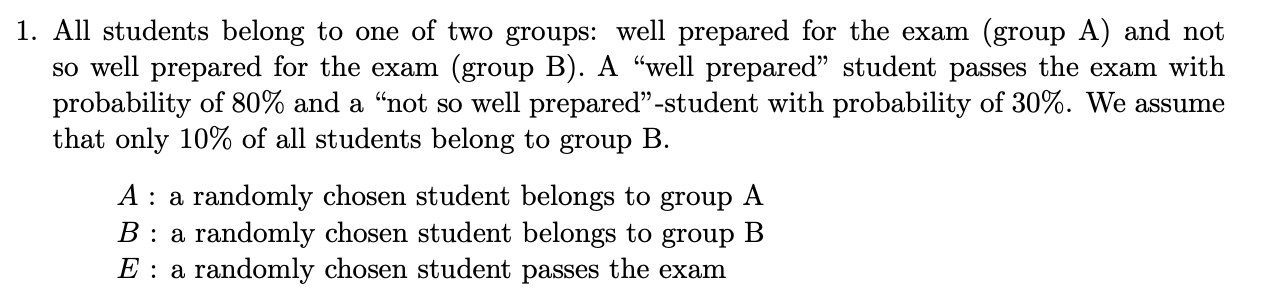

### a) 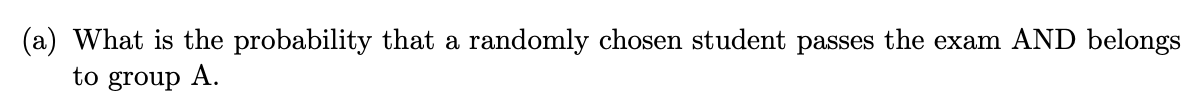

P(A) = 0.9, P(E|A) = 0.8, P(B) = 0.1, P(E|B) = 0.3 - given

A and E - ?

A and E = P(A) * P(E|A) = 0.9 * 0.8 = 0.72

### b) 
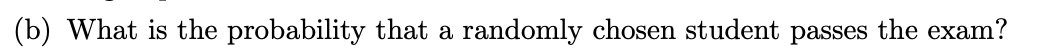

E - ?

E = P(A) * P(E|A) + P(B) * P(E|B) = 0.9 * 0.8 + 0.1 * 0.3 = 0.72 + 0.03 = 0.75

### c)
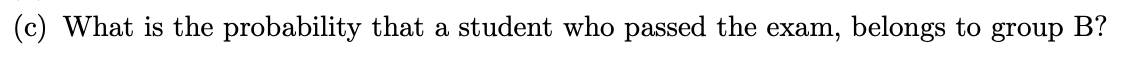

P(B|E) - ?

P(B|E) = $\frac{P(E|B) * P(B)}{P(E)}$ = $\frac{0.3 * 0.1}{0.75}$ = 0.04

## Task 2
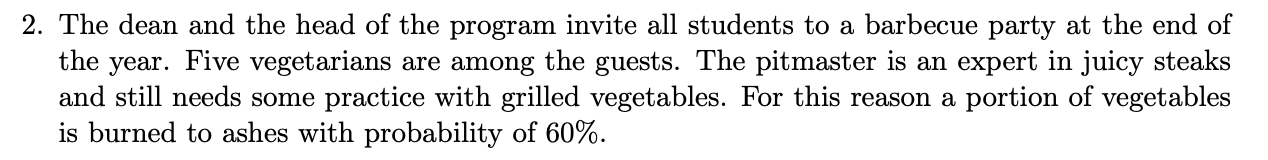

### a)
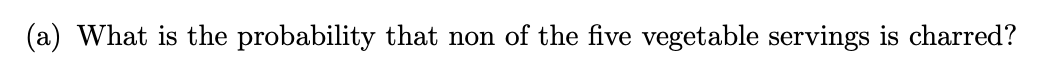

n = 5
p = 0.6 - given

X - food is burn;
X ~ B(n;p)

P(X=0) - ?

P(X=0) = f(0) = $\binom{5}{0}$ $0.6^{0}$ $(1-0.6)^{5}$ = 0.01024

### b)
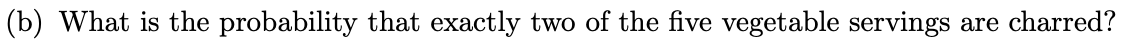

P(X=2) - ?

P(X=2) = f(2) = $\binom{5}{2}$ $0.6^{2}$ $(1-0.6)^{3}$ = 10 * 0.36 * 0.064 = 0.2304

### c)
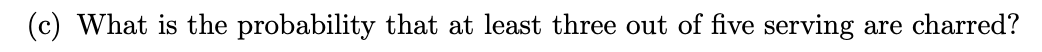

P(X>=3) - ?

P(X>=3) = 1 - P(X<2) = 1 - (f(0) + f(1) + f(2))

f(0) = 0.01024, f(2) = 0.2304 - from previous calculations

f(1) = $\binom{5}{1}$ $0.6^{1}$ $(1-0.6)^{4}$ = 5 * 0.6 * 0.0256 = 0.0768

P(X>=3) = 1 - 0.01024 - 0.2304 - 0.0768 = 0.68256

## Task 3
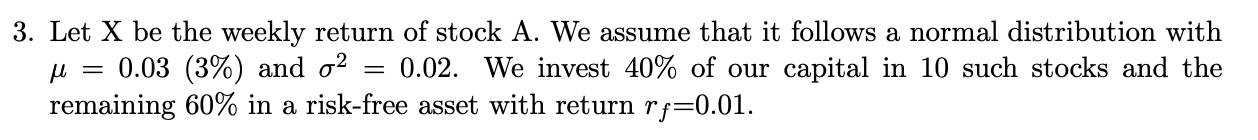

### a)
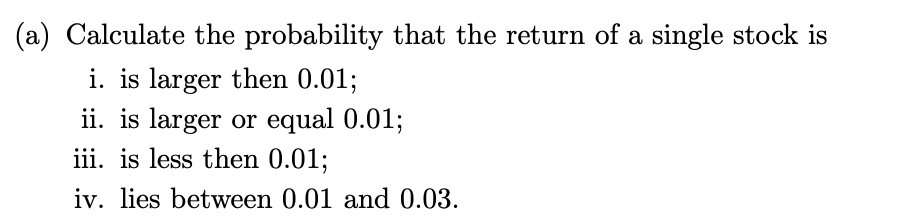

X ~ N(0.03, 0.02)

$\mu$ = 0.03, $\sigma^2$ = 0.02

In all task we use the property of continuous random variable: P(X=x) = 0 - so we can omit "=" signs

F(x) = $\phi$($\frac{x - \mu}{\sigma}$)

i) P(X>0.01) = 1 - P(X<=0.01) = 1 - P(X<0.01) = 1 - F(0.01) = 1 - $\phi$($\frac{0.01 - 0.03}{\sqrt{0.02}{}}$) = 1 - 0.1587 = 0.8413

ii) P(X>=0.01) = P(X>0.01) = 0.8413 (from "i)")

iii) P(X<0.01) = F(0.01) = 0.1587 (from "i)")

iv) P(X>0.01 and X<0.03) = P(X<0.03) - P(X<0.01) = F(0.03) - F(0.01) = $\phi$($\frac{0.03 - 0.03}{\sqrt{0.02}{}}$) - $\phi$($\frac{0.01 - 0.03}{\sqrt{0.02}{}}$) = 0.5 - 0.1587 = 0.3413

### b)
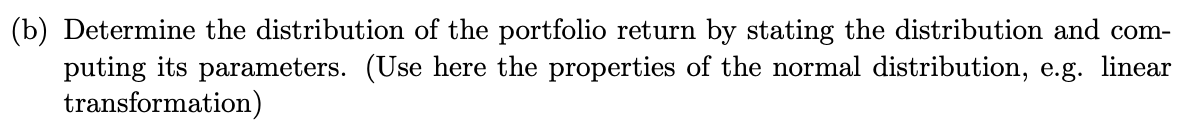

Y - portfolio return

Y = 0.4$\sum_{i=1}^{10}{N(0.03, 0.02)}$ + 0.6$r_f$

Y = 0.4 * 10 * N(0.03, 0.02) + 0.6 * $r_f$ = 4 * N(0.03, 0.02) + 0.6 * 0.01

Y = $\alpha$ * N($\mu, \sigma^2$) + $\beta$, Y ~ N($\alpha\mu + \beta, \alpha^2\sigma^2$) - using linear transformation property

E(Y) = 4 * 0.03 + 0.6 * 0.01 = 0.126

Var(Y) = $4^2$ * $0.02^2$ = 0.0064

### c)
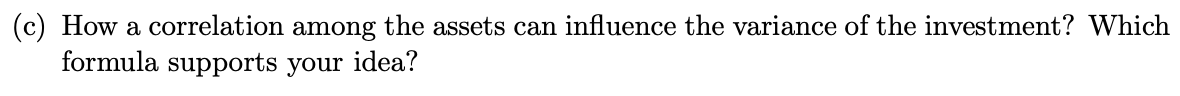

This can lead to increasing the varience as when correlation is bigger, Cov(X,Y) is also bigger:
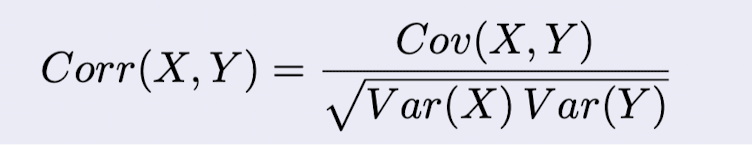

If Cov(X,Y) bigger, we also get bigger total varience of our distribution:
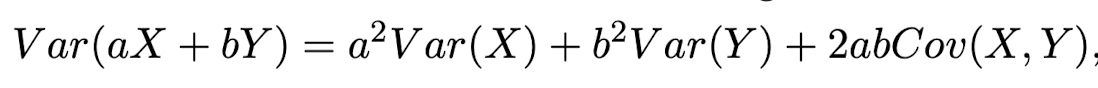

## Task 4
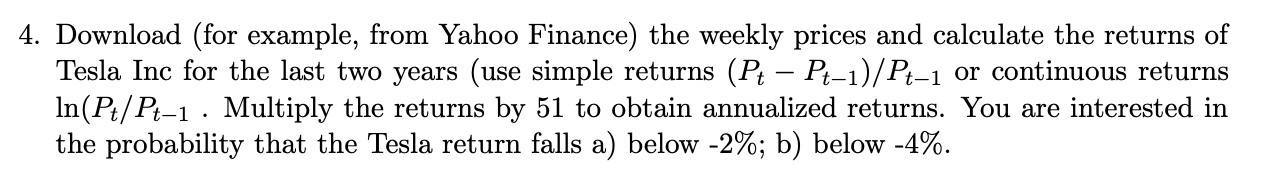

In [166]:
# calculate time period
today = datetime.datetime.today()
start = (today - datetime.timedelta(days=(3*367))).strftime('%Y-%m-%d')
today = today.strftime('%Y-%m-%d') 

# get data
df_tesla = yf.download('TSLA', start=start, end=today, interval='1wk')

# calculate returns
df_tesla['returns'] = (df_tesla['Adj Close'] - df_tesla['Adj Close'].shift(1)) / df_tesla['Adj Close'].shift(1)
df_tesla['ann_returns'] = df_tesla['returns'] * 51
df_tesla = df_tesla[['returns', 'ann_returns']][1:]
df_tesla.describe()

[*********************100%%**********************]  1 of 1 completed


returns  ann_returns
count  157.000000   157.000000
mean     0.006114     0.311832
std      0.086935     4.433703
min     -0.180257    -9.193102
25%     -0.054870    -2.798376
50%      0.003681     0.187714
75%      0.066337     3.383199
max      0.333383    17.002547

### a)
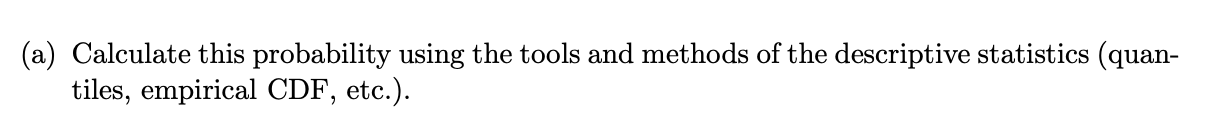

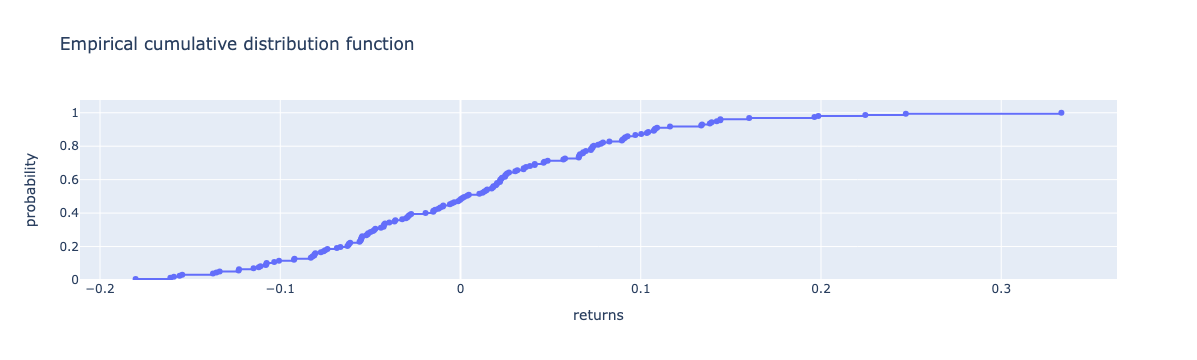

In [167]:
# plotting ECDF
fig = px.ecdf(df_tesla, x="returns", markers=True, ecdfmode="standard",
              title="Empirical cumulative distribution function")
fig.show()

By analysing ECDF we can see that (2023-10-27):

a) P(below -2%) = 0.3949

b) P(below -4%) = 0.3375

Let's calculate it also

In [168]:
# declare %
a = -0.02
b = -0.04

prob_a = (df_tesla["returns"] < a).mean()
prob_b = (df_tesla["returns"] < np.log(1 + b)).mean()

# print results
print(f"a) P(below -2%) = {prob_a}")
print(f"b) P(below -4%) = {prob_b} ")

a) P(below -2%) = 0.39490445859872614
b) P(below -4%) = 0.3375796178343949 


### b)
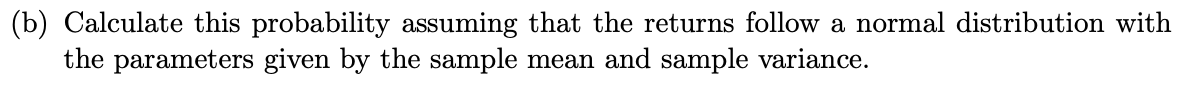

In [169]:
tesla_mean = df_tesla["returns"].mean()
tesla_std = df_tesla["returns"].std()

# calculate probs
normal_prob_a = stats.norm.cdf(a, loc=tesla_mean, scale=tesla_std)
normal_prob_b = stats.norm.cdf(b, loc=tesla_mean, scale=tesla_std)

# print results
print(f"a) P(below -2%) = {normal_prob_a}")
print(f"b) P(below -4%) = {normal_prob_b} ")

a) P(below -2%) = 0.3819405076298091
b) P(below -4%) = 0.29790196491683985 


### c)
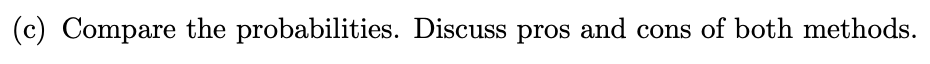

For both options, we have relatively close results. For `-2%` difference is 1%. For `-4%` the difference is higher - 4%.

**Emperical method:**

Pros
- easier to implement comparing to the second one
- allows to analyse real data, which can be different from any distributions

Cons
- can change with different sample size (we saw it in previus tasks)
- outliers problem


**Assumption method:**

Pros
- assuming some distributions will allow to use different methods and approaches that requires it
- can simplify many computational tasks

Cons
- not all data can be asssumed to some distributions
- need to perform additional steps to find correct distribution. And it need to be done again for every data drift


Summary:

The empirical method analyzes real-world data, useful for diverse and complex datasets. Assuming specific distributions, valuable for different specialized methods. Combining both approaches offers a comprehensive understanding for robust conclusions.

## Task 5 
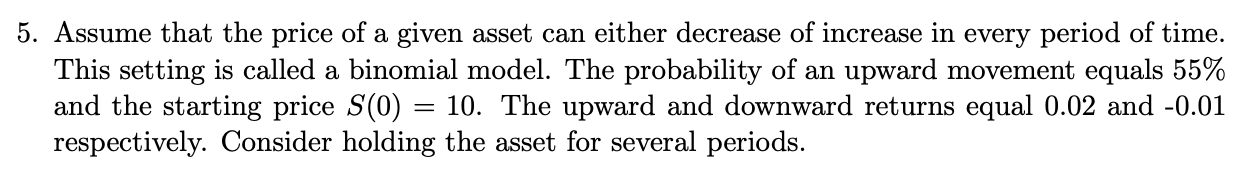

### a)
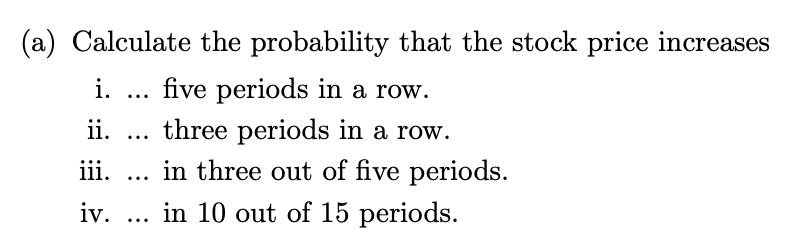

X - price increase

X ~ B(n; 0.55)

i) P(X=5) = f(5) = $\binom{5}{5}$ $0.55^{5}$ $(1-0.55)^{0}$ = $0.55^{5}$ = 0.0503284375

ii) P(X=3) = f(3) = $\binom{3}{3}$ $0.55^{3}$ $(1-0.55)^{0}$ = $0.55^{3}$ = 0.166375

iii) P(X>=3) = f(3) + f(4) + f(5) = $\binom{3}{3}$ $0.55^{3}$ $(1-0.55)^{0}$ =

= $0.55^{3}$ + $\binom{5}{4}$ $0.55^{4}$ $(1-0.55)^{1}$ + $\binom{5}{5}$ $0.55^{5}$ $(1-0.55)^{0}$ = 0.166375 + 5 * 0.09150625 * 0.45 + 0.0503284375 = 0.4225925

iv) P(X>=10) = $\sum_{n=10}^{15}f(n)$ = $\sum_{n=10}^{15}\binom{15}{n}p^n(1-p)^{15-n}$ =

= 3003 * 0.002532951621 * 0.0184528125 + 1365 * 0.001393123392 * 0.04100625 + 455 * 0.0007662178654 * 0.091125 + 105 * 0.000421419826 * 0.2025 + 15 * 0.0002317809043 * 0.45 + 0.0001274794974 = 0.260759769

### b) 
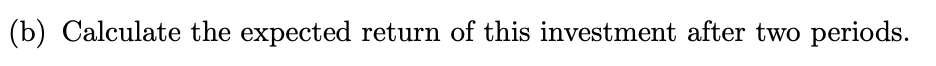

4 options: two successes OR one fail one success OR one success one fail OR two fails

p = 0.55, r = 0.02, m = -0.01

E(Y) = $p^2$r + 2p(1-p)rm + $(1-p)^2$m = 0.3025 * 0.02 - 2 * 0.55 * 0.45 * 0.02 * 0.01 - 0.2025 * 0.01 = 0.003926

## Task 6
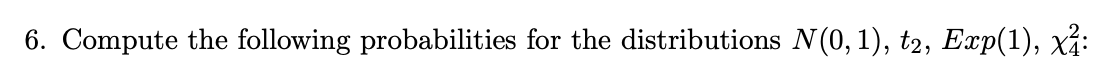

### a)
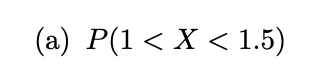

X1 ~ N(0,1) -> P(1<X1<1.5) = $\phi$(1.5) - $\phi$(1) = 0.9332 - 0.8413 = 0.0919

X2 ~ t2 -> P(1<X2<1.5) = F(1.5) - F(1) = 0.8638 - 0.78868 = 0.07512

X3 ~ Exp(1) -> P(1<X3<1.5) = F(1.5) - F(1) = 0.77687 - 0.63212 = 0.14475

X4 = $\chi^{2}_{4}$ -> P(1<X4<1.5) = F(1.5) - F(1) = 0.17336 - 0.0902 = 0.08316

### b)
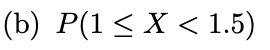

Using the property of continuous random variable: P(X=x) = 0

P(1<=X<1.5) = P(1<X<1.5)

The same answers as for a)

### c)
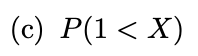

P(1<X) = P(X>1) = 1 - P(X<1)

X1 ~ N(0,1) -> 1 - P(X1<1) = 1 - $\phi$(1) = 1 - 0.8413 = 0.1587

X2 ~ t2 -> 1 - P(X2<1) = 1 - F(1) = 1 - 0.78868 = 0.21132

X3 ~ Exp(1) -> 1 - P(X3<1) = 1 - F(1) = 1 - 0.63212 = 0.36788

X4 = $\chi^{2}_{4}$ -> 1 - P(X4<1) = 1 - F(1) = 1 - 0.0902 = 0.9098

### d)
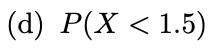

X1 ~ N(0,1) -> P(X1<1.5) = $\phi$(1.5) = 0.9332

X2 ~ t2 -> P(X2<1.5) = F(1.5) = 0.8638

X3 ~ Exp(1) -> P(X3<1.5) = F(1.5) = 0.77687

X4 = $\chi^{2}_{4}$ -> P(X4<1.5) = F(1.5) = 0.17336

### e)
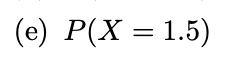

Using the property of continuous random variable: P(X=x) = 0

P(X=1.5) = 0 - for all specified distributions